In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys
import corner
sys.path.append('./Utils')
sndata = pd.read_csv('./Data/parsonage.txt', sep = ' ', engine='python')
BAO_data = pd.read_csv('./Data/BAO_data.csv', sep= ',', engine='python')

In [2]:
# observed data
mb = sndata['mb'].values
dmb = sndata['dmb'].values
z = sndata['zcmb'].values

# 1. SN data

## 1-1. Flat LCDM

In [5]:
import utils_flat as uf
import multiprocess as mp

### 1-1-1. Test MCMC

In [8]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior1 = np.array([[0.],[1.]])
    normal_vec = np.array([0.0003])*10
    std = np.array([0])*0.1
    paraminit = np.array([0.9999742233029345]) + np.random.normal(0,std)
    nstep = int(2e3)
    return uf.MCMC(uf.Other_stuff_flat, paraminit, nstep, normal_vec, Prior1)

In [9]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|██████████| 2000/2000 [00:07<00:00, 270.38it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


accept_ratio = 0.27444444444444444
Best_fit = Omega_m : 0.9999999139197914, likelihood = -1649.1671470002043
std = 0.0005363350279307531


(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        2.400e+01, 5.000e+00, 2.700e+01, 6.000e+00, 5.000e+00, 1.300e+01,
        9.000e+00, 1.900e+01, 1.500e+01, 3.000e+01, 2.200e+01, 2.800e+01,
        1.900e+01, 4.400e+01, 4.400e+01, 7.000e+01, 6.700e+01, 6.700e+01,
        9.800e+01, 1.780e+02, 1.060e+02, 2.220e+02, 2.540e+02, 3.350e+02,
        3.020e+02, 4.420e+02, 2.940e+02, 4.940e+02, 7.900e+02, 7.820e+02,
        1.167e+03, 1.194e+03]),
 array([0.99536849, 0.99546112, 0.99555375, 0.99564638, 0.99573901,
        0.99583164, 0.99592426, 0.99601689, 0.99610952, 0.99620215,
        0.99629478, 0.99638741, 0.99648003, 0.99657266, 0.99666529,
        0.99675792, 0.99685055, 0.99694318, 0.9970358 , 0.99712843,
        0.99722106, 0.99731369, 0.99740632, 0.99749895, 0.99759158,
        0.9976842 , 0.99777683, 0.99

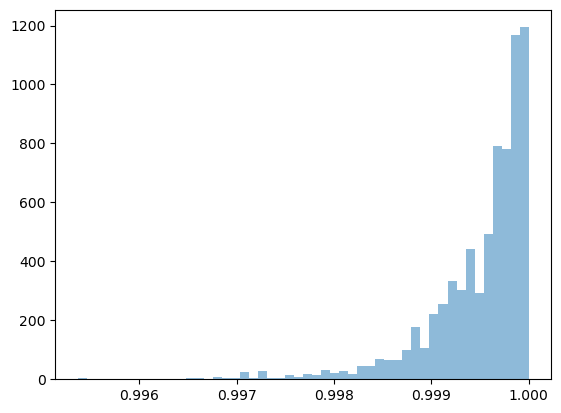

In [10]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
#MCMC_test = MCMC_test[:,200:]
accept_ratio = np.unique(MCMC_test).shape[0] / (2e3*4-200*4)

Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0])
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.hist(MCMC_test[0],bins=50,alpha=0.5, label='Omega_m')

### 1-1-2. Draw graphs

accept_ratio = 0.13373046092184368
Best_fit = Omega_m : 0.9999999993904228, likelihood = -1649.1669821575435
std = 0.0005161480983952875


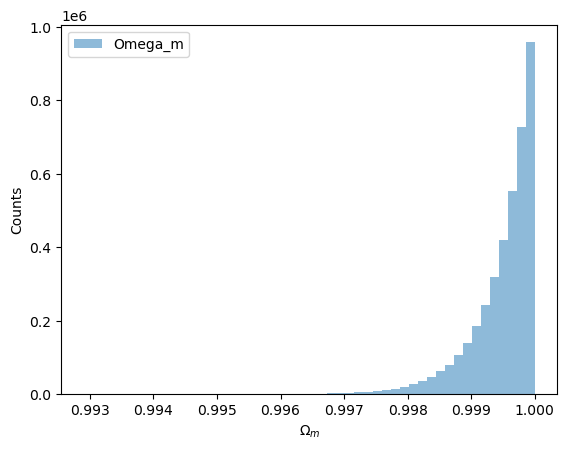

In [ ]:
results = np.load('./Results/MCMC/MCMC_flat_SN_0.npy'),np.load('./Results/MCMC/MCMC_flat_SN_1.npy'),np.load('./Results/MCMC/MCMC_flat_SN_2.npy'), np.load('./Results/MCMC/MCMC_flat_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_fin, axis=1).shape[1] / MCMC_fin.shape[1]

Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0])
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.hist(MCMC_fin[0],bins=50,alpha=0.5, label='Omega_m')
plt.xlabel(r'$\Omega_m$')
plt.ylabel('Counts')
plt.legend()
plt.savefig('./Figs/MCMC_flat_SN.png', dpi=300, bbox_inches='tight')

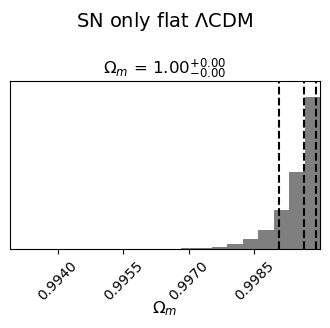

In [19]:
arr = MCMC_fin[0].T
fig = corner.corner(arr, labels=[r'$\Omega_m$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN only flat $\Lambda$CDM', fontsize=14)
fig.tight_layout()

## 1-2. Curved LCDM

In [11]:
import utils_curved as uc
import multiprocess as mp

### 1-2-1. Test MCMC

In [42]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., -3.],[6.8, 1.]])
    std = np.array([0.7765663, 0.5880332])
    normal_vec = np.array([1., 0.2])*0.35
    paraminit = np.array([3.1, 0. ]) + np.random.normal(0,std)
    nstep = int(1e3)
    return uc.MCMC(uc.Other_stuff_curved, paraminit, nstep, normal_vec, Prior2)


n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|██████████| 1000/1000 [00:08<00:00, 116.69it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [43]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
MCMC_test.shape

(3, 3200)

accept_ratio = 0.2471875
Best_fit = Omega_m : 3.467513719086898, Omegalamb : -0.16211097122938176, likelihood = -495.5269988285747
std = [0.08510738 0.14430746]


Text(0.5, 1.0, 'MCMC result for Flat LCDM')

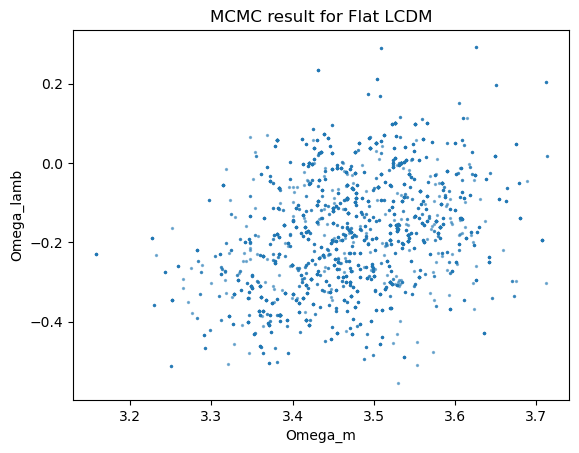

In [44]:
accept_ratio = np.unique(MCMC_test, axis=1).shape[1] / MCMC_test.shape[1]
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel('Omega_m')
plt.ylabel('Omega_lamb')
plt.title('MCMC result for Flat LCDM')

###  1-2-2. Draw graphs

accept_ratio = 0.20605867346938775
Best_fit = Omega_m : 3.469632847421885, Omegalamb : -0.16059090017927083
std = [0.08090476 0.14496374]


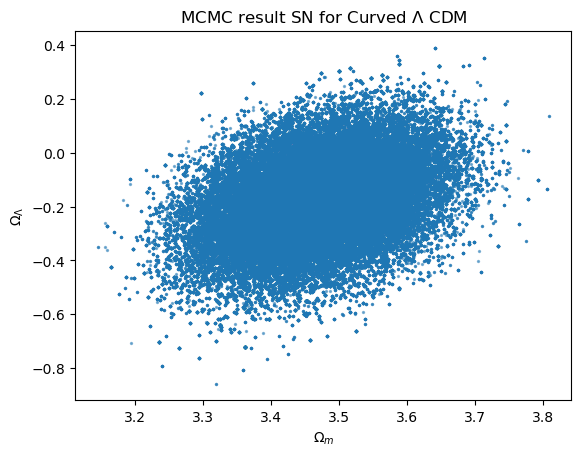

In [ ]:
results = np.load(f'./Results/MCMC/MCMC_curved_SN_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
nstep = MCMC_fin.shape[1]
accept_ratio = np.unique(MCMC_fin).shape[0] / (nstep)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}')
print(f'std = {std}')
plt.scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$\Omega_\Lambda$')
plt.title(r'MCMC result SN for Curved $\Lambda$ CDM')
plt.savefig('./Figs/MCMC_curved_SN.png')

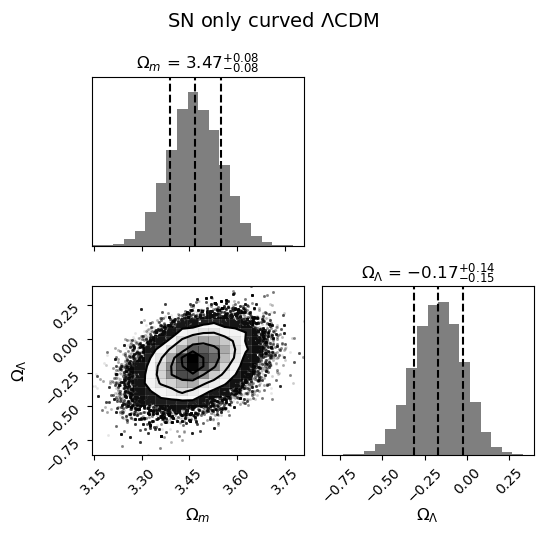

In [70]:
arr = MCMC_fin[:2].T
fig = corner.corner(arr, labels=[r'$\Omega_m$', r'$\Omega_\Lambda$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN only curved $\Lambda$CDM', fontsize=14)
fig.tight_layout()
plt.savefig('./Figs/corner_curved_SN.png', dpi=300, bbox_inches='tight')

# 2. BAO data

## 2-1. BAO data flat LCDM

In [22]:
import utils_flat_BAO as ufb
import multiprocess as mp

### 2-1-1. Test MCMC

In [25]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior1 = np.array([[0., 4.66594018],[1, 36.39070654]])
    normal_vec = np.array([0.01, 0.1])
    std = np.array([0,0.1])
    paraminit = np.array([0.9999742233029345, 31.658736569698007]) + np.random.normal(0,std)
    nstep = int(1e3)
    return ufb.MCMC_BAO(ufb.BAO_flat, paraminit, nstep, normal_vec, Prior1)

In [26]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|██████████| 1000/1000 [00:01<00:00, 611.25it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [27]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.215625
Best_fit = Omega_m : 0.9999780080788702, H0 : 31.690604495139425, likelihood = -157.5969166075857
std = [0.00385368 0.12296245]


Text(0.5, 1.0, 'MCMC result BAO for Flat LCDM')

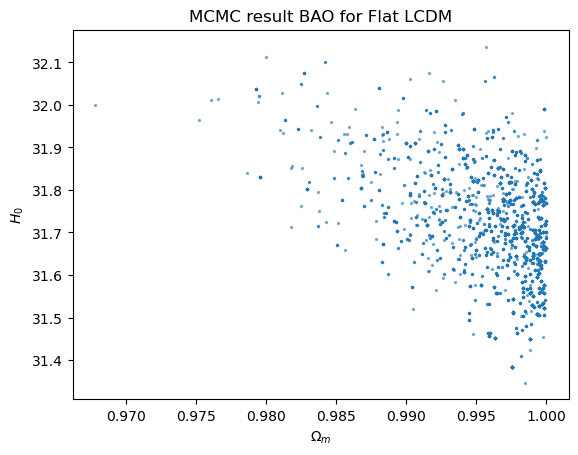

In [28]:
accept_ratio = np.unique(MCMC_test, axis=1).shape[1] / MCMC_test.shape[1]
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, H0 : {Best_fit[1]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$H_0$')
plt.title('MCMC result BAO for Flat LCDM')

### 2-1-2. Draw graphs

accept_ratio = 0.23002525252525252
Best_fit = Omega_m : 0.9999989897667958, H0 : 31.6766030562221
std = [0.00378264 0.11891189]


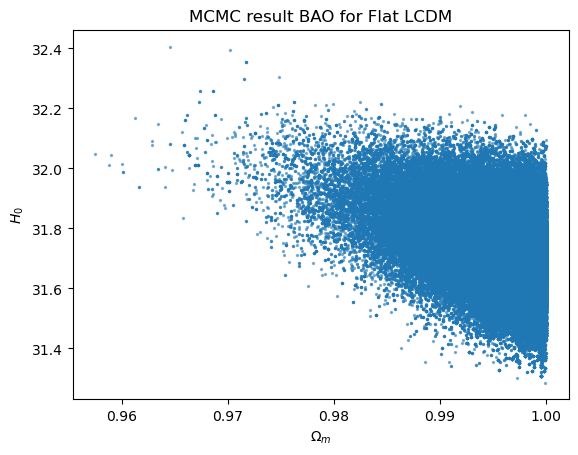

In [ ]:
# real analysis
results = np.load(f'./Results/MCMC/MCMC_flat_BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_fin, axis=1).shape[1] / MCMC_fin.shape[1]
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, H0 : {Best_fit[1]}')
print(f'std = {std}')
plt.scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$H_0$')
plt.title('MCMC result BAO for Flat LCDM')
plt.savefig('./Figs/MCMC_flat_BAO.png', dpi=300, bbox_inches='tight')

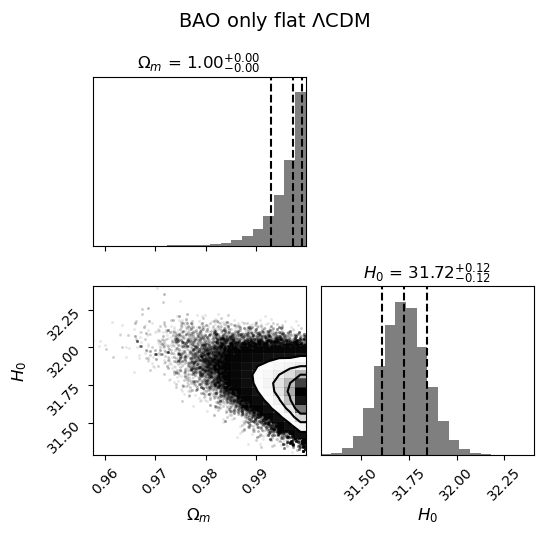

In [72]:
arr = MCMC_fin[:2].T
fig = corner.corner(arr, labels=[r'$\Omega_m$', r'$H_0$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'BAO only flat $\Lambda$CDM', fontsize=14)
fig.tight_layout()
plt.savefig('./Figs/corner_flat_BAO.png', dpi=300, bbox_inches='tight')

## 2-2. BAO data curved LCDM

### 2-2-1. Test MCMC

In [46]:
import utils_curved_BAO as ucb
import multiprocess as mp

In [48]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., -3., 7.309670710],[20, 1., 23.17205389]])
    std = np.array([0.30967346, 0.37778227, 0.44020213])
    normal_vec = np.array([0.0590695, 0.08, 0.11])* 2
    paraminit = np.array([3.518803845192434,  -0.19403381170893674,20.071034556246392]) + np.random.normal(0,std)
    nstep = int(1e3)
    return ucb.MCMC_BAO(ucb.BAO_curved, paraminit, nstep, normal_vec, Prior2)
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|██████████| 1000/1000 [00:02<00:00, 471.69it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


accept_ratio = 0.2346875
Best_fit = Omega_m : 4.535343902067686, Omegalamb : -0.2814540951347685, H0 : 18.144085251200043
std = [0.60589953 0.45170675 0.9612373 ]


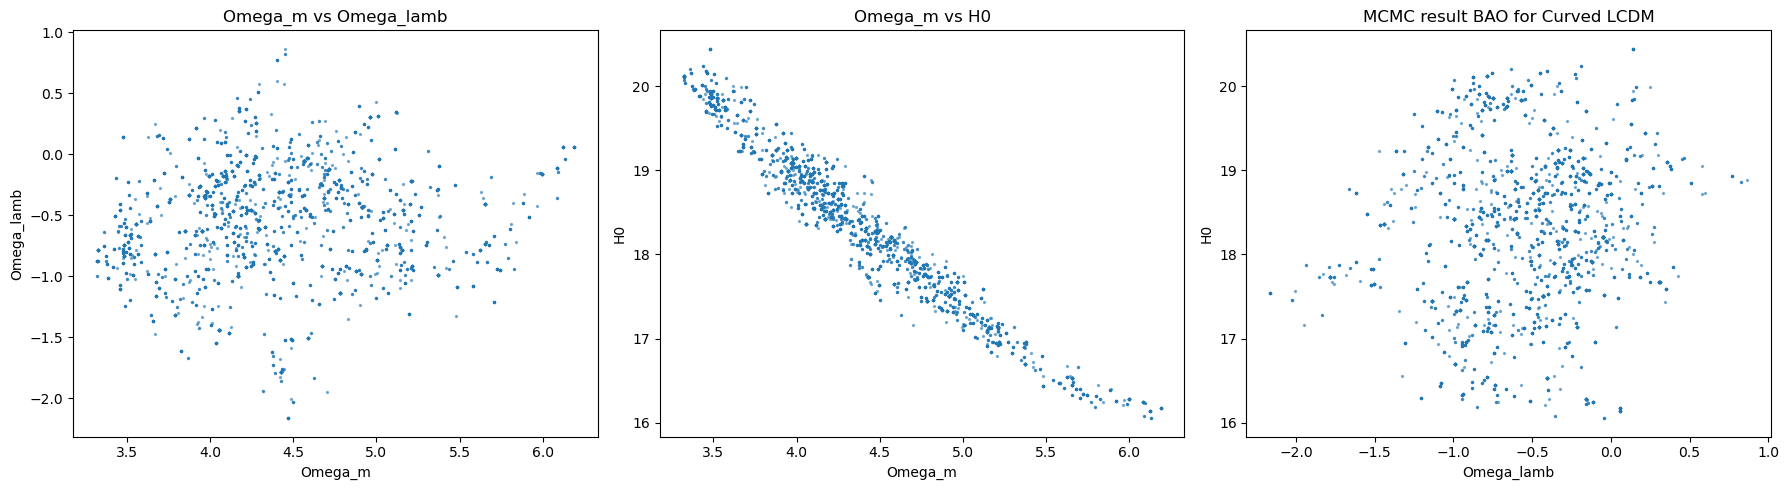

In [49]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = np.unique(MCMC_test, axis=1).shape[1] / MCMC_test.shape[1]
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_test[0], MCMC_test[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_test[1], MCMC_test[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')
plt.title('MCMC result BAO for Curved LCDM')
plt.tight_layout()
#plt.savefig('MCMC_result_curved_LCDM_SN+BAO.png')
plt.show()

### 2-2-2. Draw graphs

accept_ratio = 0.21192567567567566
Best_fit = Omega_m : 4.525119713247277, Omegalamb : -0.35640760867168864, H0 : 18.134233740846927
std = [0.28951225 0.47193084 0.45721992]


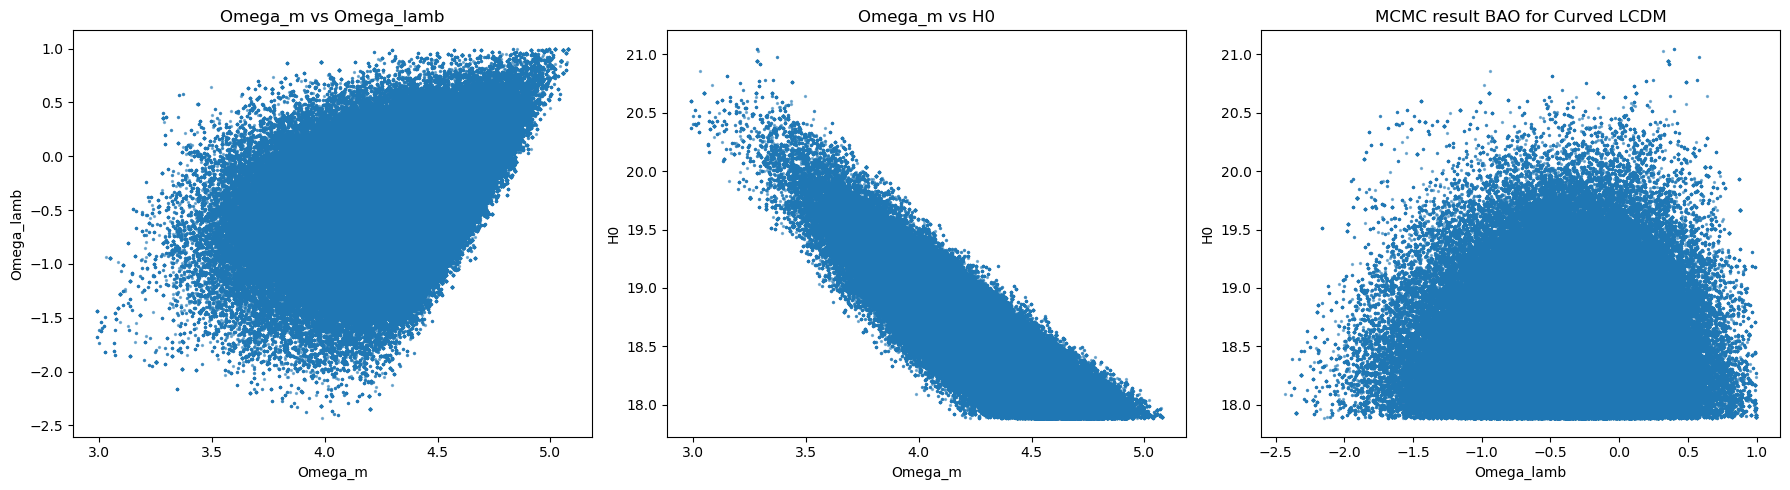

In [4]:
results = np.load(f'./Results/MCMC/MCMC_curved_BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_3.npy')

burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = np.unique(MCMC_test, axis=1).shape[1] / MCMC_test.shape[1]
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_test[0], MCMC_test[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_test[1], MCMC_test[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')
plt.title('MCMC result BAO for Curved LCDM')
plt.tight_layout()
plt.savefig('./Figs/MCMC_curved_BAO.png')
plt.show()

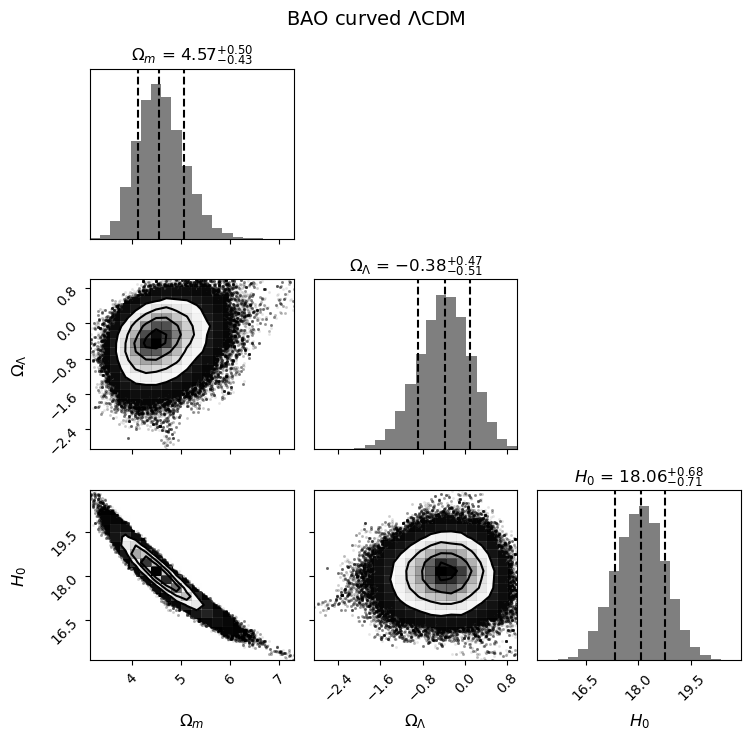

In [81]:
arr = MCMC_test[:3].T
fig = corner.corner(arr, labels=[r'$\Omega_m$',r'$\Omega_\Lambda$', r'$H_0$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'BAO curved $\Lambda$CDM', fontsize=14)
fig.tight_layout()
plt.savefig('./Figs/corner_curved_BAO.png', dpi=300, bbox_inches='tight')

# 3. SN + BAO data


BAO data consists of 
$$D_V(z) = \left[\cfrac{cz}{H_0}\cfrac{D_M^2(z)}{E(z)} \right]^{1/3}$$
$$D_M(z) = d_p(z)$$
$$R_{eq} = 3\rho_{eq}/4\rho_{rad} \approx \cfrac{3}{4} \cfrac{\Omega_{b,0}h^2}{1.48\times10^{-6}}\cfrac{1}{1+z_{eq}}$$
$$f_{baryon} = \cfrac{\Omega_{b,0}}{\Omega_{m,0}} = 0.167$$
$$z_{rec} \approx 2426.3839 \ (\text{Calculated using CAMB}) $$
$$1+z_{eq} = \cfrac{\Omega_{m,0}}{\Omega_{rad,0}} = \cfrac{\Omega_{m,0}h^2}{1.48\times10^{-6}}$$

We calculate the $r_{d,fid}$ with the following equation.
$$r_{d,fid} = \cfrac{1}{\sqrt{\Omega_{m,0}H_0^2}}\cfrac{2c}{\sqrt{3z_{eq}R_{eq}}}\ln\left[\cfrac{\sqrt{1+R_{rec}} + \sqrt{R_{rec} + R_{eq}}}{1 + \sqrt{R_{eq}}}\right]$$

## 3-1. Flat LCDM

In [2]:

import utils_flat_SNBAO as ufsb
import multiprocess as mp

### 3-1-1. Test MCMC

In [3]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0.,  7.309670710],[1, 33.74697601]])
    std = np.array([0.,  0.11162995])
    normal_vec = np.array([0.0003614, 0.11162995])*2.
    paraminit = np.array([0.9999742233029345,  31.689002893196257]) + np.random.normal(0,std)
    nstep = int(1e3)
    return ufsb.MCMC_SNBAO(ufsb.Other_stuff_flat, ufsb.BAO_flat, paraminit, nstep, normal_vec, Prior2)



In [4]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|██████████| 1000/1000 [00:20<00:00, 49.58it/s]


/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [5]:
burn_in = 400
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.2325
Best_fit = Omega_m : 0.9999777904484252, Omegalamb : 31.67649951859098, likelihood = -1806.6194248986744
std = [0.00041795 0.1046719 ]


Text(0.5, 1.0, 'MCMC result SN + BAO for Flat LCDM')

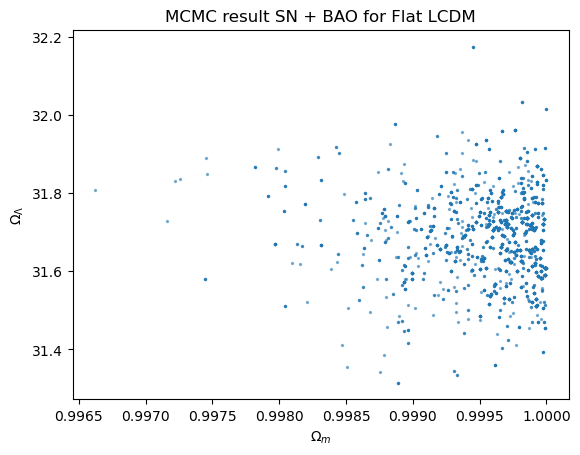

In [6]:
accept_ratio = np.unique(MCMC_test, axis=1).shape[1] / MCMC_test.shape[1]
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, likelihood = {Best_fit[-1]}')
print(f'std = {std}')
plt.scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$\Omega_\Lambda$')
plt.title('MCMC result SN + BAO for Flat LCDM')
#plt.savefig('./2025/Field_research/Results/MCMC_flat_BAO.png', dpi=300, bbox_inches='tight')

### 3-1-2. Draw graphs

accept_ratio = 0.23993959731543624
Best_fit = Omega_m : 0.9999996222752752, Omegalamb : 31.67622677512548
std = [0.00045765 0.11061877]


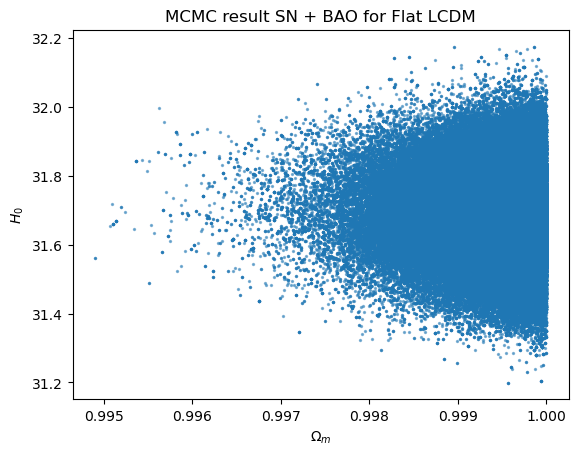

In [5]:
# real analysis
results = np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
accept_ratio = np.unique(MCMC_fin, axis=1).shape[1] / MCMC_fin.shape[1]
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:2], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}')
print(f'std = {std}')
plt.scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$H_0$')
plt.title('MCMC result SN + BAO for Flat LCDM')
plt.savefig('./Figs/MCMC_flat_SNBAO.png', dpi=300, bbox_inches='tight')

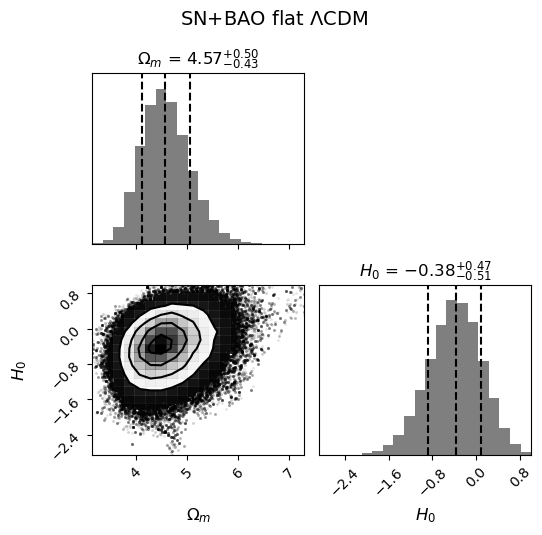

In [77]:
arr = MCMC_test[:2].T
fig = corner.corner(arr, labels=[r'$\Omega_m$', r'$H_0$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN+BAO flat $\Lambda$CDM', fontsize=14)
fig.tight_layout()
plt.savefig('./Figs/corner_flat_SNBAO.png', dpi=300, bbox_inches='tight')

## 3-2. Curved LCDM

### 3-2-1. Test MCMC

In [57]:

import utils_curved_SNBAO as ucsb
import multiprocess as mp

In [58]:
def run_mcmc_test(seed):
    np.random.seed(seed)
    Prior2 = np.array([[0., -3., 4.66594018],[20, 1., 35.39070654]])
    std = np.array([0.0790695, 0.13510082, 0.17355321])
    normal_vec = np.array([0.0590695, 0.08, 0.11])*1.5
    paraminit = np.array([3.518803845192434,  -0.19403381170893674,20.071034556246392]) + np.random.normal(0,std)
    nstep = int(2*1e3)
    return ucsb.MCMC_SNBAO(ucsb.Other_stuff_curved, ucsb.BAO_curved, paraminit, nstep, normal_vec, Prior2)

In [59]:
n_chain = 4
with mp.Pool(processes=n_chain) as pool:
    results = pool.map(run_mcmc_test, range(n_chain))

100%|██████████| 2000/2000 [00:52<00:00, 38.09it/s]
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '
/opt/anaconda3/lib/python3.12/multiprocessing/resource_tracker.py:254: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
  warnings.warn('resource_tracker: There appear to be %d '


In [60]:
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.22208333333333333
Best_fit = Omega_m : 3.5102710475401717, Omegalamb : -0.17947022626011475, H0 : 20.099792364667707, loglikelihood = -505.7713059858638
std = [0.07691813 0.13424134 0.17613493]


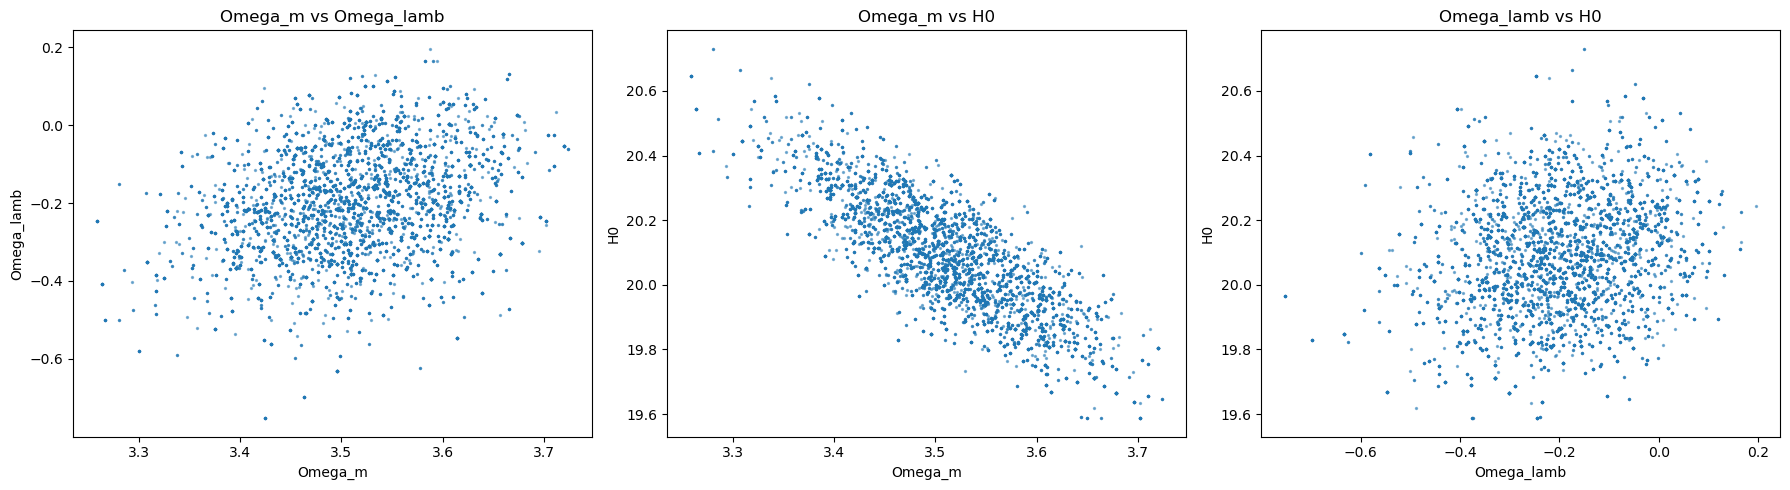

In [61]:
accept_ratio = np.unique(MCMC_test, axis=1).shape[1] / MCMC_test.shape[1]
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
std = np.std(MCMC_test[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}, loglikelihood = {Best_fit[-1]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_test[0], MCMC_test[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_test[0], MCMC_test[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_test[1], MCMC_test[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')

plt.tight_layout()
plt.show()

### 3-2-2. Draw graphs

In [6]:
# showing results
results = np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_3.npy')
burn_in = 500
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)

accept_ratio = 0.21445150501672242
Best_fit = Omega_m : 3.510110720374394, Omegalamb : -0.19514373970072574, H0 : 20.092194930042183, loglikelihood = -502.87471168736727
std = [0.07846186 0.13667761 0.17313254]


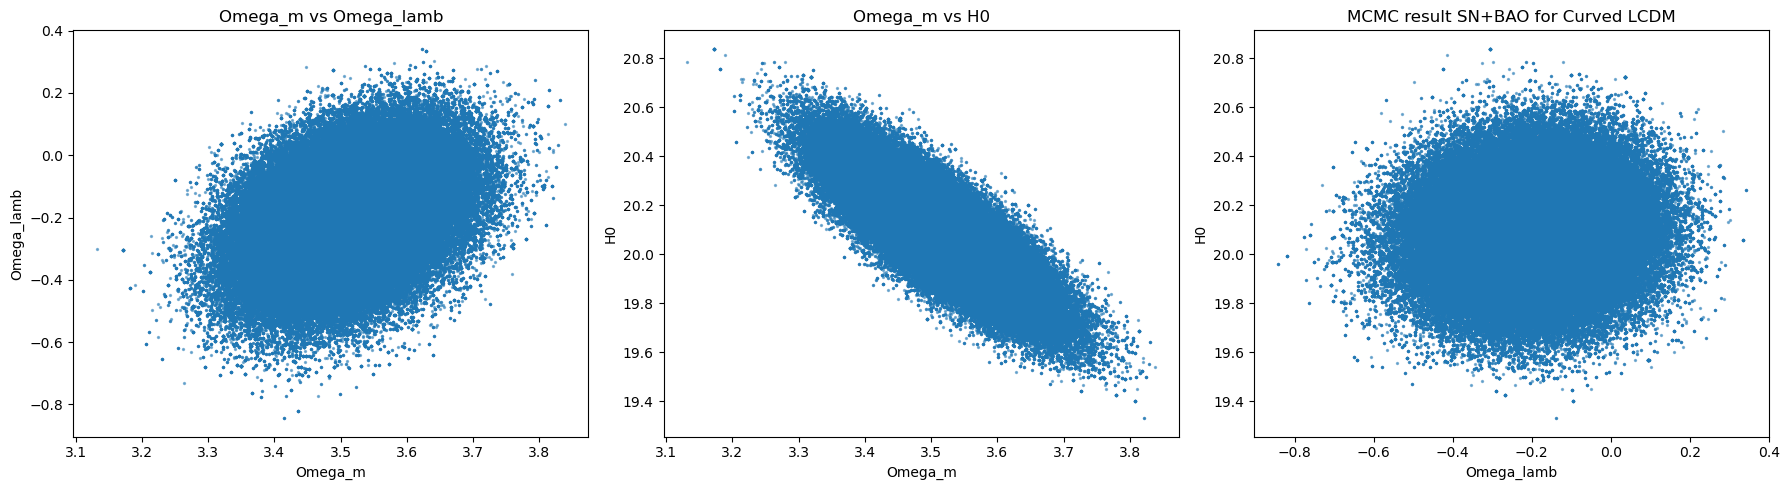

In [7]:
accept_ratio = np.unique(MCMC_fin[0:2], axis=1).shape[1] / MCMC_fin.shape[1]
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
std = np.std(MCMC_fin[0:3], axis=1)
print(f'accept_ratio = {accept_ratio}')
print(f'Best_fit = Omega_m : {Best_fit[0]}, Omegalamb : {Best_fit[1]}, H0 : {Best_fit[2]}, loglikelihood = {Best_fit[-1]}')
print(f'std = {std}')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Omega_m vs Omega_lamb
axs[0].scatter(MCMC_fin[0], MCMC_fin[1], s=2, alpha=0.5)
axs[0].set_xlabel('Omega_m')
axs[0].set_ylabel('Omega_lamb')
axs[0].set_title('Omega_m vs Omega_lamb')

# 2. Omega_m vs H0
axs[1].scatter(MCMC_fin[0], MCMC_fin[2], s=2, alpha=0.5)
axs[1].set_xlabel('Omega_m')
axs[1].set_ylabel('H0')
axs[1].set_title('Omega_m vs H0')

# 3. Omega_lamb vs H0
axs[2].scatter(MCMC_fin[1], MCMC_fin[2], s=2, alpha=0.5)
axs[2].set_xlabel('Omega_lamb')
axs[2].set_ylabel('H0')
axs[2].set_title('Omega_lamb vs H0')
plt.title('MCMC result SN+BAO for Curved LCDM')
plt.tight_layout()
plt.savefig('./Figs/MCMC_curved_SNBAO.png')
plt.show()

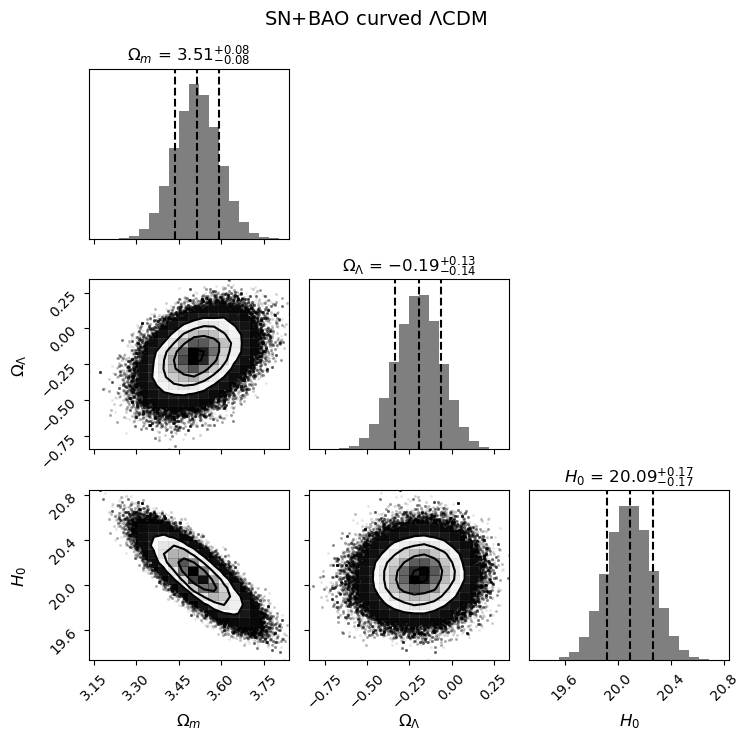

In [4]:
arr = MCMC_fin[:3].T
fig = corner.corner(arr, labels=[r'$\Omega_m$',r'$\Omega_\Lambda$', r'$H_0$'], quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 12}, label_kwargs={"fontsize": 12}, hist_kwargs={"histtype": "stepfilled", "alpha": 0.5})
_ = fig.suptitle(r'SN+BAO curved $\Lambda$CDM', fontsize=14)
fig.tight_layout()
plt.savefig('./Figs/corner_curved_SNBAO.png', dpi=300, bbox_inches='tight')

# 4. Results in comparison with the data

## 4-1. SN Flat LCDM

In [3]:
import utils_flat as uf

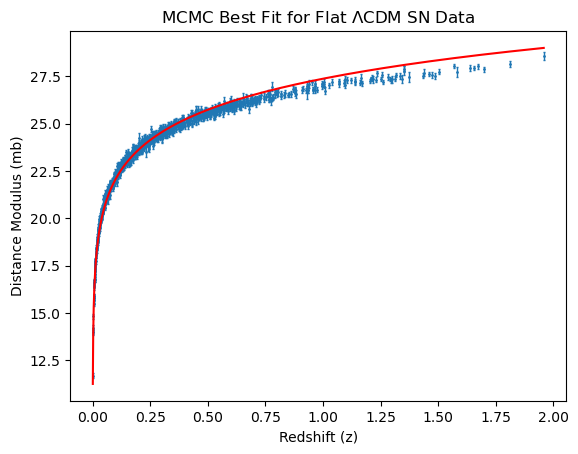

In [4]:
results = np.load('./Results/MCMC/MCMC_flat_SN_0.npy'),np.load('./Results/MCMC/MCMC_flat_SN_1.npy'),np.load('./Results/MCMC/MCMC_flat_SN_2.npy'), np.load('./Results/MCMC/MCMC_flat_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]

parm_flat = np.array([Best_fit[0]])
m_calc_SNflat = uf.A(uf.Other_stuff_flat, mb, dmb,z, parm_flat) + uf.B(uf.Other_stuff_flat,parm_flat, z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNflat[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data',zorder=1)

plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red',zorder=2)
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Flat $\Lambda$CDM SN Data')
plt.savefig('./Figs/MCMC_SN_flat_best_fit_toSNdata.png', dpi=300, bbox_inches='tight')

## 4-2 SN Curved LCDM

In [5]:
import utils_curved as uc

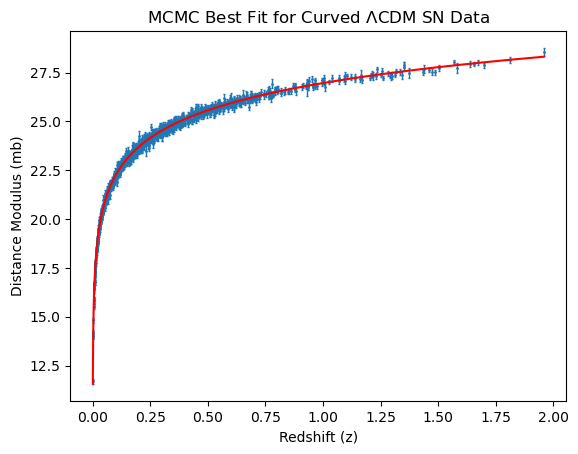

In [6]:
results = np.load(f'./Results/MCMC/MCMC_curved_SN_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]

parm_curved = Best_fit[:2]
m_calc_SNcurved = uc.A(uc.Other_stuff_curved, mb, dmb,z, parm_curved) + uc.B(uc.Other_stuff_curved,parm_curved,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNcurved[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Curved $\Lambda$CDM SN Data')
plt.savefig('./Figs/MCMC_SN_curved_best_fit_toSNdata.png', dpi=300, bbox_inches='tight')

## 4-3 BAO Flat LCDM

Text(0, 0.5, 'Distance Modulus (mb)')

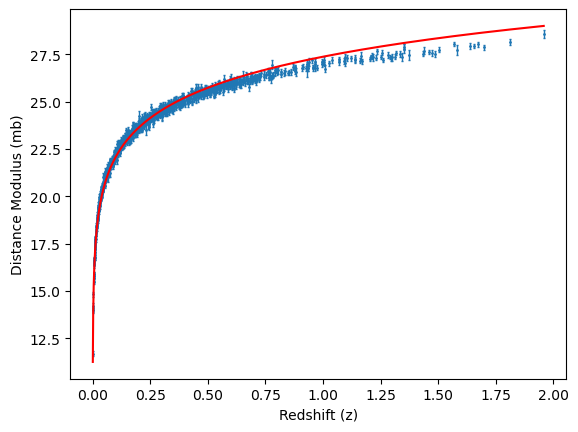

In [ ]:
import utils_flat_BAO as ufb
import utils_flat as uf
results = np.load(f'./Results/MCMC/MCMC_flat_BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
parmBAO_flat = Best_fit[:-1]
parmSN_flat = parmBAO_flat[:-1]
m_calc_SNflat = uf.A(uf.Other_stuff_flat, mb, dmb,z, parmBAO_flat) + uf.B(uf.Other_stuff_flat,parmBAO_flat,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNflat[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')

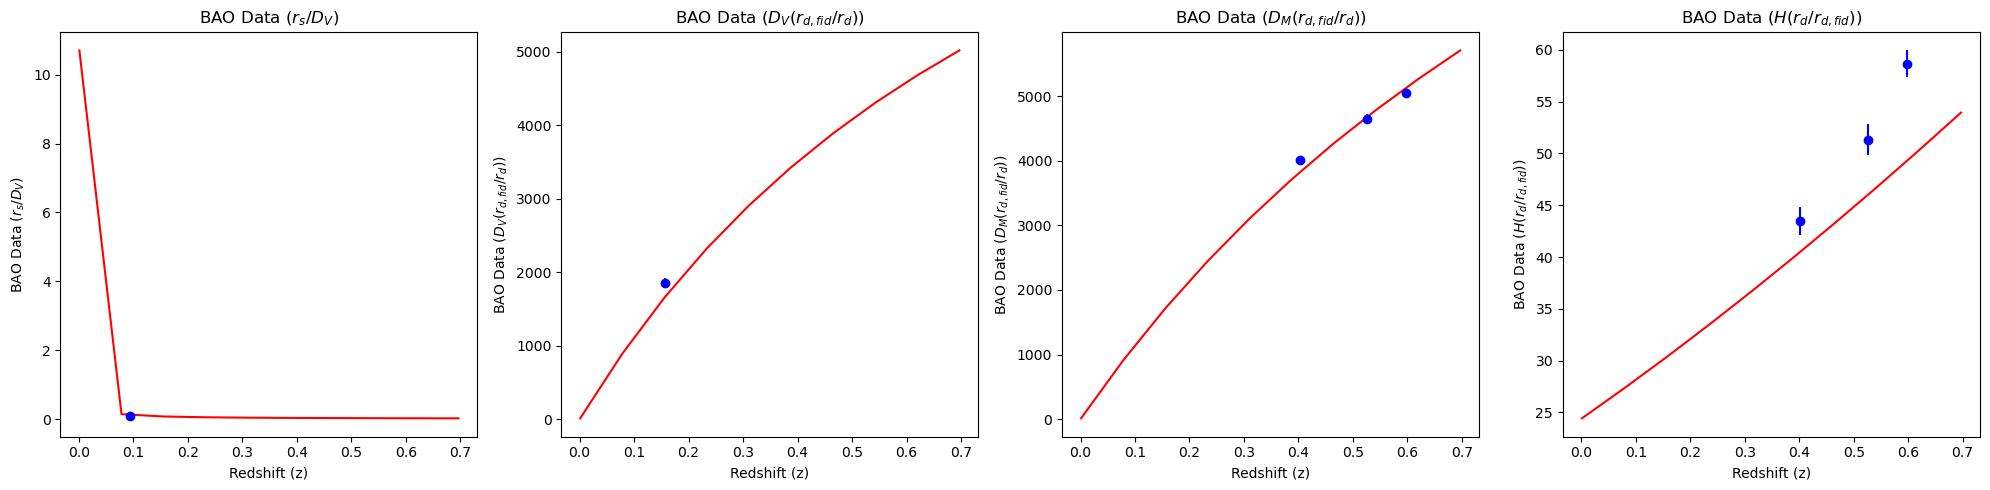

In [ ]:
z_BAO = BAO_data['z'].values
ind_BAO = BAO_data['ind'].values
BAO_val = BAO_data['val'].values
BAO_err = BAO_data['err'].values

zarr = np.linspace(0.001, z_BAO.max()+0.1, 10)
zind1 = np.ones(zarr.shape[0])
zind2 = zind1 + 1
zind3 = zind1 + 2
zind4 = zind1 + 3
BAO_data_theory1 = pd.DataFrame({
    'z': zarr,
    'ind': zind1,
})
BAO_data_theory2 = pd.DataFrame({
    'z': zarr,
    'ind': zind2,
})
BAO_data_theory3 = pd.DataFrame({
    'z': zarr,
    'ind': zind3,
})
BAO_data_theory4 = pd.DataFrame({
    'z': zarr,
    'ind': zind4,
})
baoTheory_ind1 = ufb.BAO_flat(BAO_data_theory1, parmBAO_flat)
baoTheory_ind2 = ufb.BAO_flat(BAO_data_theory2, parmBAO_flat)
baoTheory_ind3 = ufb.BAO_flat(BAO_data_theory3, parmBAO_flat)
baoTheory_ind4 = ufb.BAO_flat(BAO_data_theory4, parmBAO_flat)



fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].errorbar(z_BAO[ind_BAO==1], BAO_val[ind_BAO==1], yerr=BAO_err[ind_BAO==1], fmt='o', label='Observed Data', color='blue')
axs[0].plot(zarr, baoTheory_ind1, label='MCMC Best Fit', color='red')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel(r'BAO Data $(r_s/D_V)$')
axs[0].set_title(r'BAO Data $(r_s/D_V)$')
axs[1].errorbar(z_BAO[ind_BAO==2], BAO_val[ind_BAO==2], yerr=BAO_err[ind_BAO==2], fmt='o', label='Observed Data', color='blue')
axs[1].plot(zarr, baoTheory_ind2, label='MCMC Best Fit', color='red')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_ylabel(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[1].set_title(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[2].errorbar(z_BAO[ind_BAO==3], BAO_val[ind_BAO==3], yerr=BAO_err[ind_BAO==3], fmt='o', label='Observed Data', color='blue')
axs[2].plot(zarr, baoTheory_ind3, label='MCMC Best Fit', color='red')
axs[2].set_xlabel('Redshift (z)')
axs[2].set_ylabel(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[2].set_title(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[3].errorbar(z_BAO[ind_BAO==4], BAO_val[ind_BAO==4], yerr=BAO_err[ind_BAO==4], fmt='o', label='Observed Data', color='blue')
axs[3].plot(zarr, baoTheory_ind4, label='MCMC Best Fit', color='red')
axs[3].set_xlabel('Redshift (z)')
axs[3].set_ylabel(r'BAO Data $(H(r_d/r_{d,fid}))$')
axs[3].set_title(r'BAO Data $(H(r_d/r_{d,fid}))$')
plt.tight_layout()

## 4-4 BAO Curved LCDM

Text(0, 0.5, 'Distance Modulus (mb)')

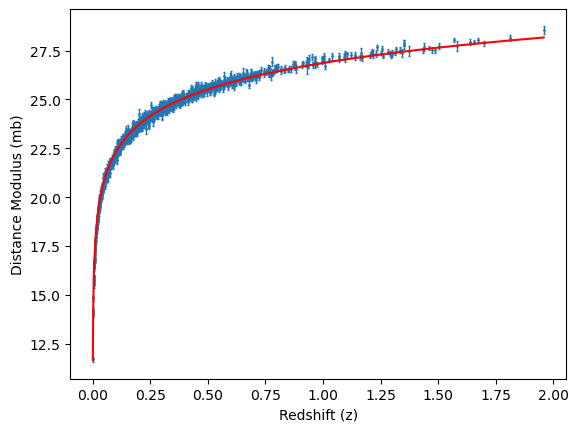

In [23]:
import utils_curved_BAO as ucb
import utils_curved as uc
results = np.load(f'./Results/MCMC/MCMC_curved_BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
parmBAO_curved = Best_fit[:-1]
parmSN_curved = parmBAO_curved[:-1]
m_calc_SNfcurved = uc.A(uc.Other_stuff_curved, mb, dmb,z, parmSN_curved) + uc.B(uc.Other_stuff_curved,parmSN_curved,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNfcurved[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')

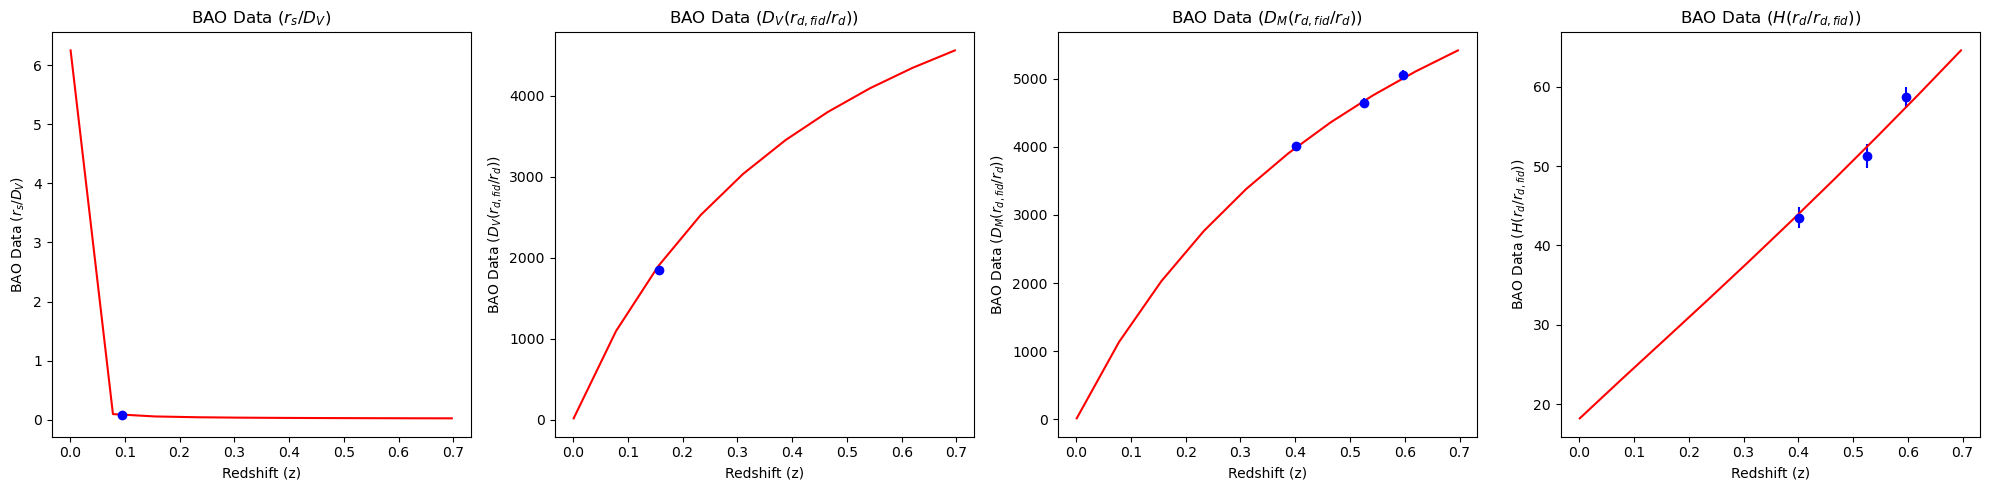

In [26]:
z_BAO = BAO_data['z'].values
ind_BAO = BAO_data['ind'].values
BAO_val = BAO_data['val'].values
BAO_err = BAO_data['err'].values

zarr = np.linspace(0.001, z_BAO.max()+0.1, 10)
zind1 = np.ones(zarr.shape[0])
zind2 = zind1 + 1
zind3 = zind1 + 2
zind4 = zind1 + 3
BAO_data_theory1 = pd.DataFrame({
    'z': zarr,
    'ind': zind1,
})
BAO_data_theory2 = pd.DataFrame({
    'z': zarr,
    'ind': zind2,
})
BAO_data_theory3 = pd.DataFrame({
    'z': zarr,
    'ind': zind3,
})
BAO_data_theory4 = pd.DataFrame({
    'z': zarr,
    'ind': zind4,
})
baoTheory_ind1 = ucb.BAO_curved(BAO_data_theory1, parmBAO_curved)
baoTheory_ind2 = ucb.BAO_curved(BAO_data_theory2, parmBAO_curved)
baoTheory_ind3 = ucb.BAO_curved(BAO_data_theory3, parmBAO_curved)
baoTheory_ind4 = ucb.BAO_curved(BAO_data_theory4, parmBAO_curved)



fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].errorbar(z_BAO[ind_BAO==1], BAO_val[ind_BAO==1], yerr=BAO_err[ind_BAO==1], fmt='o', label='Observed Data', color='blue')
axs[0].plot(zarr, baoTheory_ind1, label='MCMC Best Fit', color='red')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel(r'BAO Data $(r_s/D_V)$')
axs[0].set_title(r'BAO Data $(r_s/D_V)$')
axs[1].errorbar(z_BAO[ind_BAO==2], BAO_val[ind_BAO==2], yerr=BAO_err[ind_BAO==2], fmt='o', label='Observed Data', color='blue')
axs[1].plot(zarr, baoTheory_ind2, label='MCMC Best Fit', color='red')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_ylabel(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[1].set_title(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[2].errorbar(z_BAO[ind_BAO==3], BAO_val[ind_BAO==3], yerr=BAO_err[ind_BAO==3], fmt='o', label='Observed Data', color='blue')
axs[2].plot(zarr, baoTheory_ind3, label='MCMC Best Fit', color='red')
axs[2].set_xlabel('Redshift (z)')
axs[2].set_ylabel(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[2].set_title(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[3].errorbar(z_BAO[ind_BAO==4], BAO_val[ind_BAO==4], yerr=BAO_err[ind_BAO==4], fmt='o', label='Observed Data', color='blue')
axs[3].plot(zarr, baoTheory_ind4, label='MCMC Best Fit', color='red')
axs[3].set_xlabel('Redshift (z)')
axs[3].set_ylabel(r'BAO Data $(H(r_d/r_{d,fid}))$')
axs[3].set_title(r'BAO Data $(H(r_d/r_{d,fid}))$')
plt.tight_layout()

## 4-5. SN + BAO Flat LCDM

In [27]:
import utils_flat_SNBAO as ufsb


Text(0.5, 1.0, 'MCMC Best Fit for Flat $\\Lambda$CDM SN+BAO Data')

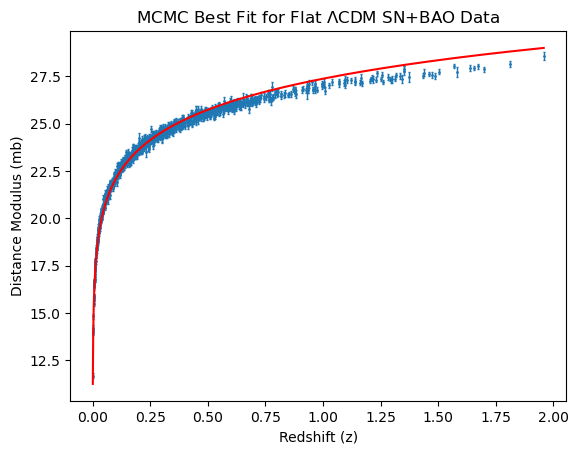

In [30]:
results = np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_3.npy')
burn_in = 2000
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]

parmBAO_flat = Best_fit[:1]
m_calc_SNflat = ufsb.A(ufsb.Other_stuff_flat, mb, dmb,z, parmBAO_flat) + ufsb.B(ufsb.Other_stuff_flat,parmBAO_flat,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNflat[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Flat $\Lambda$CDM SN+BAO Data')

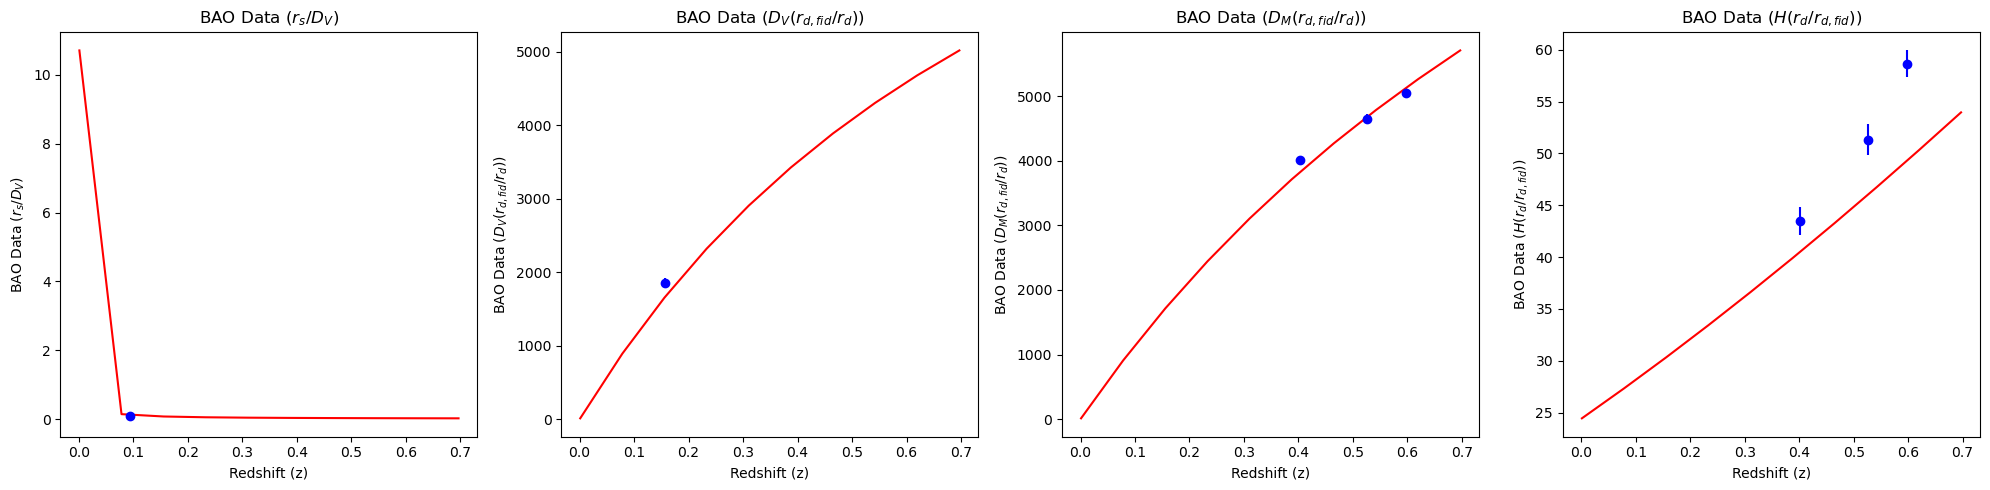

In [31]:
parmBAO_flatbao = Best_fit[:2]
z_BAO = BAO_data['z'].values
ind_BAO = BAO_data['ind'].values

zarr = np.linspace(0.001, z_BAO.max()+0.1, 10)
zind1 = np.ones(zarr.shape[0])
zind2 = zind1 + 1
zind3 = zind1 + 2
zind4 = zind1 + 3
BAO_data_theory1 = pd.DataFrame({
    'z': zarr,
    'ind': zind1,
})
BAO_data_theory2 = pd.DataFrame({
    'z': zarr,
    'ind': zind2,
})
BAO_data_theory3 = pd.DataFrame({
    'z': zarr,
    'ind': zind3,
})
BAO_data_theory4 = pd.DataFrame({
    'z': zarr,
    'ind': zind4,
})
baoTheory_ind1 = ufb.BAO_flat(BAO_data_theory1, parmBAO_flatbao)
baoTheory_ind2 = ufb.BAO_flat(BAO_data_theory2, parmBAO_flatbao)
baoTheory_ind3 = ufb.BAO_flat(BAO_data_theory3, parmBAO_flatbao)
baoTheory_ind4 = ufb.BAO_flat(BAO_data_theory4, parmBAO_flatbao)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].errorbar(z_BAO[ind_BAO==1], BAO_val[ind_BAO==1], yerr=BAO_err[ind_BAO==1], fmt='o', label='Observed Data', color='blue')
axs[0].plot(zarr, baoTheory_ind1, label='MCMC Best Fit', color='red')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel(r'BAO Data $(r_s/D_V)$')
axs[0].set_title(r'BAO Data $(r_s/D_V)$')
axs[1].errorbar(z_BAO[ind_BAO==2], BAO_val[ind_BAO==2], yerr=BAO_err[ind_BAO==2], fmt='o', label='Observed Data', color='blue')
axs[1].plot(zarr, baoTheory_ind2, label='MCMC Best Fit', color='red')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_ylabel(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[1].set_title(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[2].errorbar(z_BAO[ind_BAO==3], BAO_val[ind_BAO==3], yerr=BAO_err[ind_BAO==3], fmt='o', label='Observed Data', color='blue')
axs[2].plot(zarr, baoTheory_ind3, label='MCMC Best Fit', color='red')
axs[2].set_xlabel('Redshift (z)')
axs[2].set_ylabel(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[2].set_title(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[3].errorbar(z_BAO[ind_BAO==4], BAO_val[ind_BAO==4], yerr=BAO_err[ind_BAO==4], fmt='o', label='Observed Data', color='blue')
axs[3].plot(zarr, baoTheory_ind4, label='MCMC Best Fit', color='red')
axs[3].set_xlabel('Redshift (z)')
axs[3].set_ylabel(r'BAO Data $(H(r_d/r_{d,fid}))$')
axs[3].set_title(r'BAO Data $(H(r_d/r_{d,fid}))$')
plt.tight_layout()

## 4-6. SN + BAO Curved LCDM

In [ ]:
import utils_curved_SNBAO as ucsb

Text(0.5, 1.0, 'MCMC Best Fit for Curved $\\Lambda$CDM SN+BAO Data')

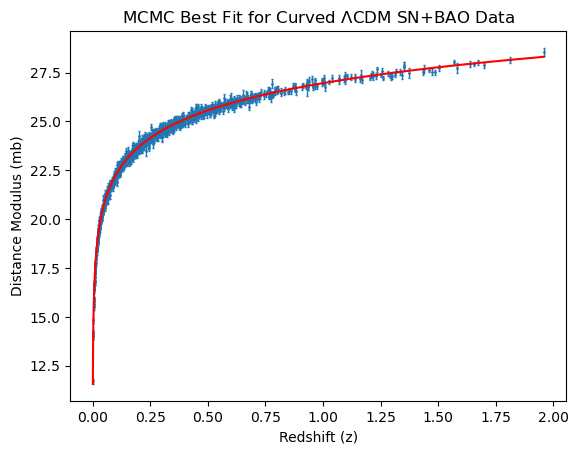

In [56]:
results = np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_0.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_1.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_2.npy'), np.load(f'./2025/Field_research/Results/MCMC_curved_SN+BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
parmBAO_curvedbao = Best_fit[:3]

parmBAO_curved = Best_fit[:2]
m_calc_SNcurved = ucb.A(ucb.Other_stuff_curved, mb, dmb,z, parmBAO_curved) + ucb.B(ucb.Other_stuff_curved,parmBAO_curved,z)
zrearrange = z[np.argsort(z)]
m_calcrearrange = m_calc_SNcurved[np.argsort(z)]
plt.errorbar(z, mb, yerr=dmb,capsize=1,elinewidth=1,markersize=1, fmt='o', label='Observed Data', zorder=1)
plt.plot(zrearrange, m_calcrearrange, label='MCMC Best Fit', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (mb)')
plt.title(r'MCMC Best Fit for Curved $\Lambda$CDM SN+BAO Data')

In [52]:

parm_curved = np.array([ 3.50223891e+00,  5.86543948e-05,11.])

z_BAO = BAO_data['z'].values
ind_BAO = BAO_data['ind'].values

zarr = np.linspace(0.001, z_BAO.max()+0.1, 10)
zind1 = np.ones(zarr.shape[0])
zind2 = zind1 + 1
zind3 = zind1 + 2
zind4 = zind1 + 3
BAO_data_theory1 = pd.DataFrame({
    'z': zarr,
    'ind': zind1,
})
BAO_data_theory2 = pd.DataFrame({
    'z': zarr,
    'ind': zind2,
})
BAO_data_theory3 = pd.DataFrame({
    'z': zarr,
    'ind': zind3,
})
BAO_data_theory4 = pd.DataFrame({
    'z': zarr,
    'ind': zind4,
})
baoTheory_ind1 = ucb.BAO_curved(BAO_data_theory1, parmBAO_curvedbao)
baoTheory_ind2 = ucb.BAO_curved(BAO_data_theory2, parmBAO_curvedbao)
baoTheory_ind3 = ucb.BAO_curved(BAO_data_theory3, parmBAO_curvedbao)
baoTheory_ind4 = ucb.BAO_curved(BAO_data_theory4, parmBAO_curvedbao)

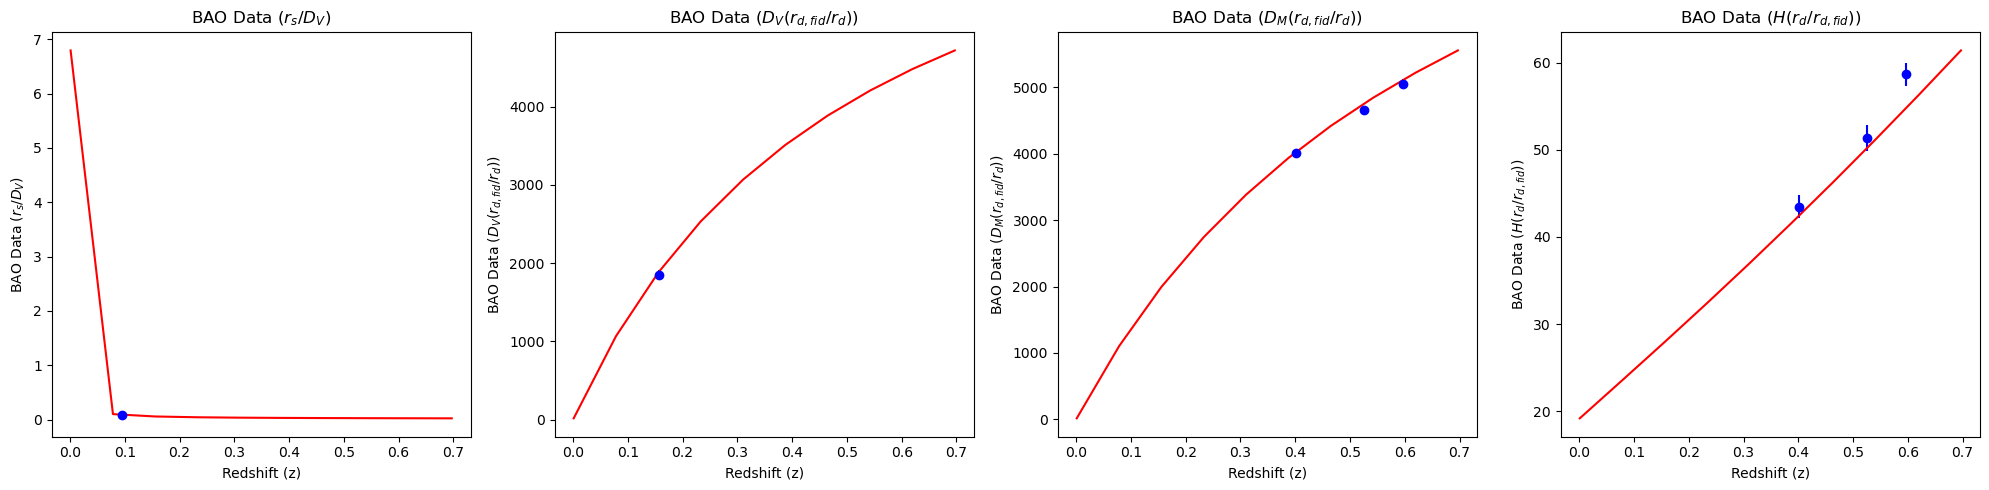

In [53]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].errorbar(z_BAO[ind_BAO==1], BAO_val[ind_BAO==1], yerr=BAO_err[ind_BAO==1], fmt='o', label='Observed Data', color='blue')
axs[0].plot(zarr, baoTheory_ind1, label='MCMC Best Fit', color='red')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel(r'BAO Data $(r_s/D_V)$')
axs[0].set_title(r'BAO Data $(r_s/D_V)$')
axs[1].errorbar(z_BAO[ind_BAO==2], BAO_val[ind_BAO==2], yerr=BAO_err[ind_BAO==2], fmt='o', label='Observed Data', color='blue')
axs[1].plot(zarr, baoTheory_ind2, label='MCMC Best Fit', color='red')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_ylabel(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[1].set_title(r'BAO Data $(D_V(r_{d,fid}/r_d))$')
axs[2].errorbar(z_BAO[ind_BAO==3], BAO_val[ind_BAO==3], yerr=BAO_err[ind_BAO==3], fmt='o', label='Observed Data', color='blue')
axs[2].plot(zarr, baoTheory_ind3, label='MCMC Best Fit', color='red')
axs[2].set_xlabel('Redshift (z)')
axs[2].set_ylabel(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[2].set_title(r'BAO Data $(D_M(r_{d,fid}/r_d))$')
axs[3].errorbar(z_BAO[ind_BAO==4], BAO_val[ind_BAO==4], yerr=BAO_err[ind_BAO==4], fmt='o', label='Observed Data', color='blue')
axs[3].plot(zarr, baoTheory_ind4, label='MCMC Best Fit', color='red')
axs[3].set_xlabel('Redshift (z)')
axs[3].set_ylabel(r'BAO Data $(H(r_d/r_{d,fid}))$')
axs[3].set_title(r'BAO Data $(H(r_d/r_{d,fid}))$')
plt.tight_layout()